In [8]:
#pip install numpy pandas scikit-learn

In [18]:
import numpy as np
import pandas as pd 
import sklearn
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from PIL import Image
import matplotlib.pyplot as plt


In [10]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

In [11]:
# Function to visualize some images from the dataset
def visualize_mnist_images(X, y, num_images=10):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(X.iloc[i].values.reshape(28, 28), cmap='gray')
        plt.title(f"Label: {y.iloc[i]}")
        plt.axis('off')
    plt.show()

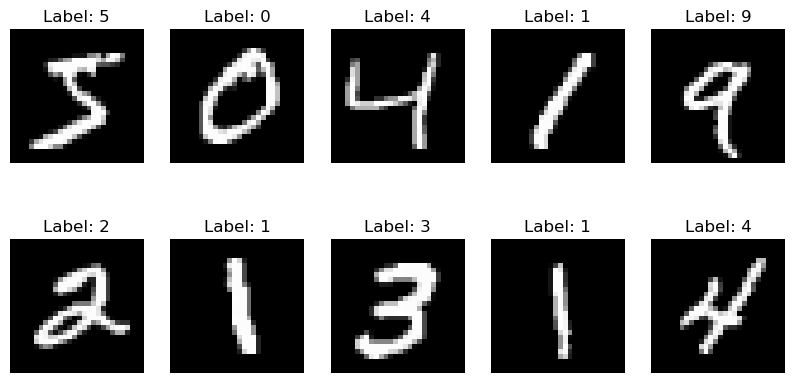

In [12]:
# Visualize 10 images from the dataset
visualize_mnist_images(X, y, num_images = 10)

Split the dataset into training and testing sets:

In [13]:
X = X / 255.0 # Normalize dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

You can use a Support Vector Machine (SVM) for classification:

In [14]:

svm_clf = SVC(degree=5)
svm_clf.fit(X_train, y_train)

SVC(degree=5)

Check the accuracy of your model on the test set:

In [15]:

y_pred = svm_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 97.64%


In [19]:
# Function to preprocess a custom image
def preprocess_image(image_path):
    img = Image.open(image_path).convert('L')
    img = img.resize((28, 28))
    img_array = np.array(img) / 255.0
    img_array = img_array.reshape(1, -1)
    return img_array

# Example usage
image_path = 'due.png'
processed_image = preprocess_image(image_path)


In [20]:

# Predict the digit
predicted_digit = svm_clf.predict(processed_image)
print(f"Predicted Digit: {predicted_digit[0]}")

Predicted Digit: 2


c:\Users\Me\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
